In [255]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statistics import mode

In [256]:
df = pd.read_csv("https://github.com/ArinB/MSBA-CA-Data/raw/main/CA01/house-price-train.csv")

In [257]:
#pd.set_option('display.max_columns', None)
#pd.reset_option('max_columns')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [258]:
#pd.set_option('display.max_rows', None)
#pd.reset_option('max_rows')
df.nunique()

Id               1460
MSSubClass         15
MSZoning            5
LotFrontage       110
LotArea          1073
                 ... 
MoSold             12
YrSold              5
SaleType            9
SaleCondition       6
SalePrice         663
Length: 81, dtype: int64

In [259]:
#print the DF's shape
print(df.shape)

(1460, 81)


In [260]:
#print the DF's data types
print(df.dtypes)

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object


In [261]:
#check for missing values
print(df.isnull().sum())

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64


In [262]:
#pd.set_option('display.max_columns', None)
#pd.reset_option('max_columns')
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [263]:
df.duplicated().sum()
#no duplicate records

0

# Distribution of Numerical and Categorical Columns


In [264]:
#Graphs below offer a better visualization of the distrubitution of each numerical and categorical column seperately
###This gives a bettter understanding of certain columns within the Data Frame and how many times they appear within the data set

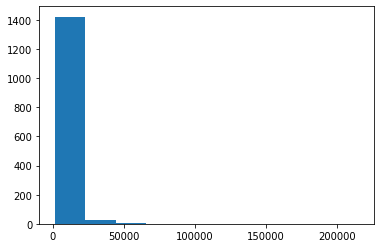

In [265]:
#visualize distribution of a numeric column
plt.hist(df['LotArea'])
plt.show()

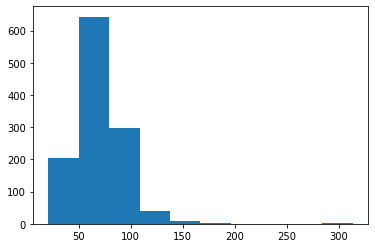

In [266]:
#other numeric cols including
plt.hist(df['LotFrontage'])
plt.show()

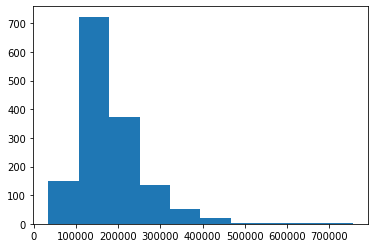

In [267]:
plt.hist(df['SalePrice'])
plt.show()

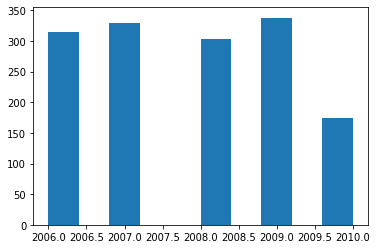

In [268]:
plt.hist(df['YrSold'])
plt.show()

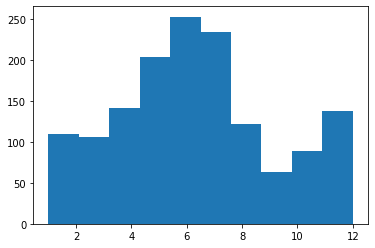

In [269]:
plt.hist(df['MoSold'])
plt.show()

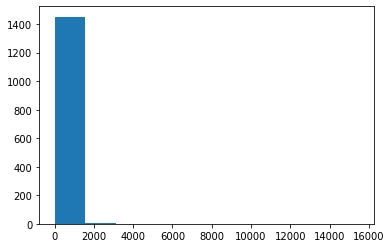

In [270]:
plt.hist(df['MiscVal'])
plt.show()

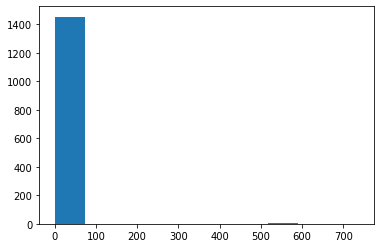

In [271]:
plt.hist(df['PoolArea'])
plt.show()

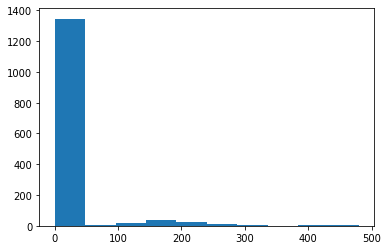

In [272]:
plt.hist(df['ScreenPorch'])
plt.show()

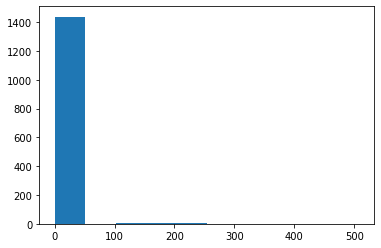

In [273]:
plt.hist(df['3SsnPorch'])
plt.show()

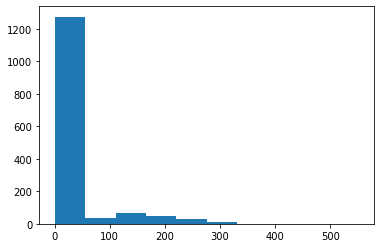

In [274]:
plt.hist(df['EnclosedPorch'])
plt.show()

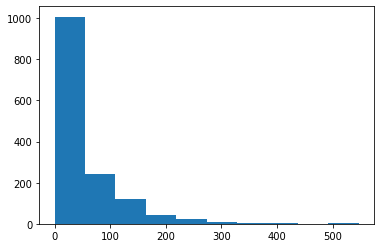

In [275]:
plt.hist(df['OpenPorchSF'])
plt.show()

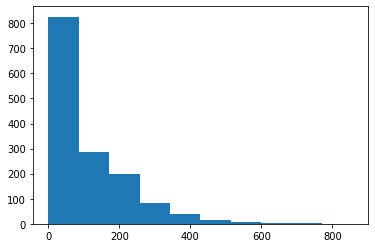

In [276]:
plt.hist(df['WoodDeckSF'])
plt.show()

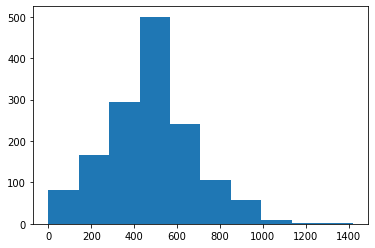

In [277]:
plt.hist(df['GarageArea'])
plt.show()

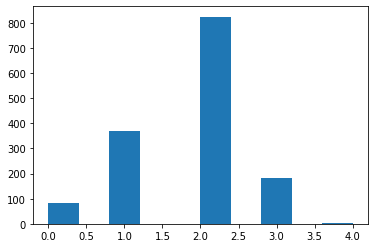

In [278]:
plt.hist(df['GarageCars'])
plt.show()

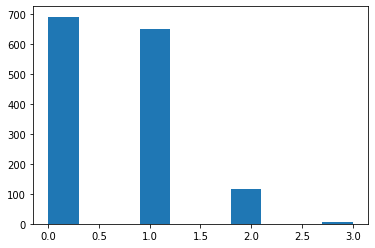

In [279]:
plt.hist(df['Fireplaces'])
plt.show()

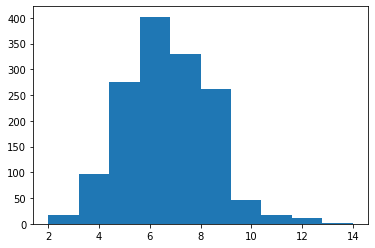

In [280]:
plt.hist(df['TotRmsAbvGrd'])
plt.show()

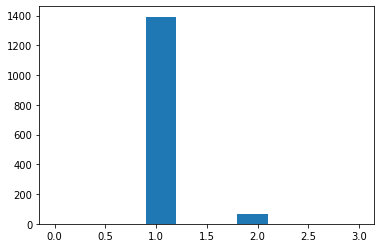

In [281]:
plt.hist(df['KitchenAbvGr'])
plt.show()

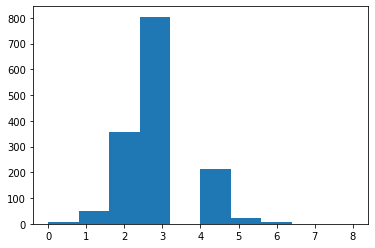

In [282]:
plt.hist(df['BedroomAbvGr'])
plt.show()

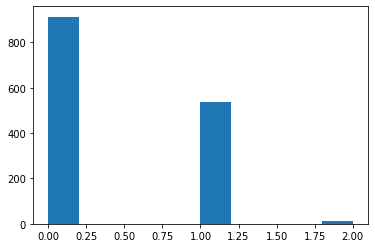

In [283]:
plt.hist(df['HalfBath'])
plt.show()

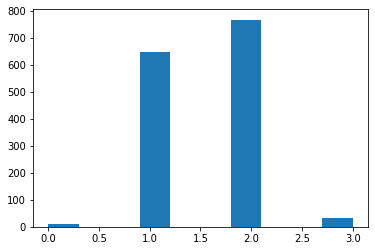

In [284]:
plt.hist(df['FullBath'])
plt.show()

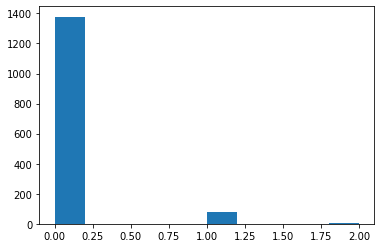

In [285]:
plt.hist(df['BsmtHalfBath'])
plt.show()

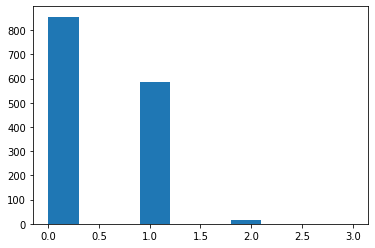

In [286]:
plt.hist(df['BsmtFullBath'])
plt.show()

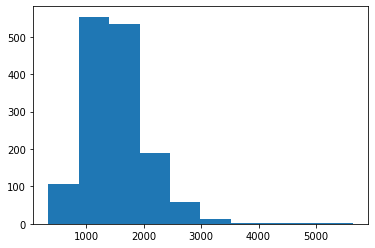

In [287]:
plt.hist(df['GrLivArea'])
plt.show()

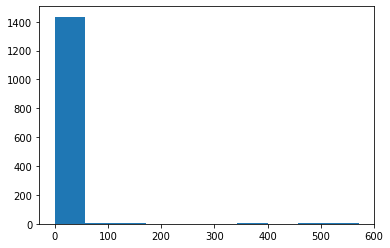

In [288]:
plt.hist(df['LowQualFinSF'])
plt.show()

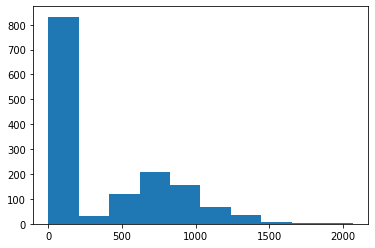

In [289]:
plt.hist(df['2ndFlrSF'])
plt.show()

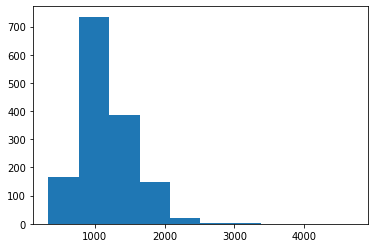

In [290]:
plt.hist(df['1stFlrSF'])
plt.show()

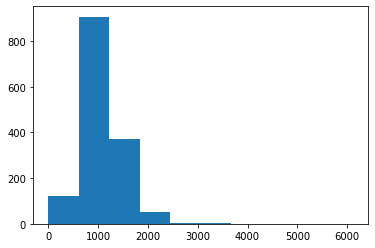

In [291]:
plt.hist(df['TotalBsmtSF'])
plt.show()

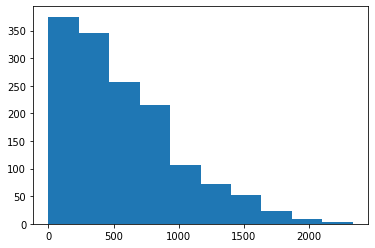

In [292]:
plt.hist(df['BsmtUnfSF'])
plt.show()

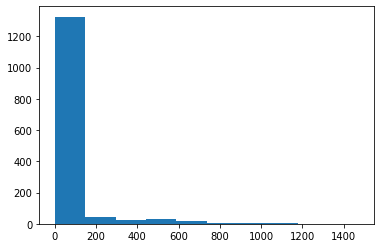

In [293]:
plt.hist(df['BsmtFinSF2'])
plt.show()

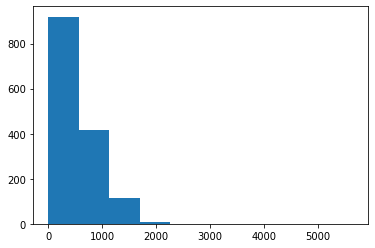

In [294]:
plt.hist(df['BsmtFinSF1'])
plt.show()

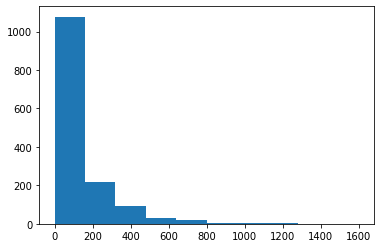

In [295]:
plt.hist(df['MasVnrArea'])
plt.show()

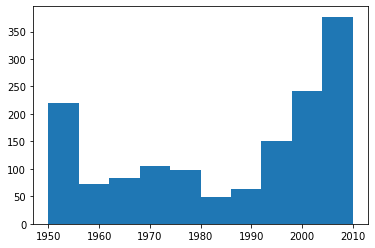

In [296]:
plt.hist(df['YearRemodAdd'])
plt.show()

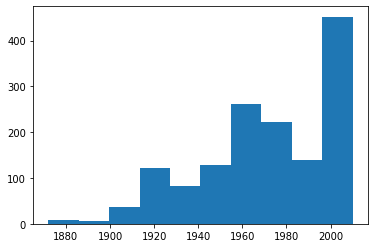

In [297]:
plt.hist(df['YearBuilt'])
plt.show()

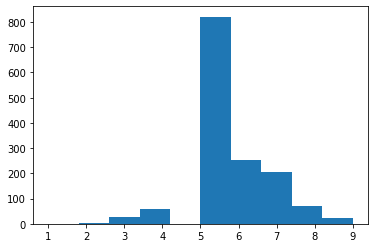

In [298]:
plt.hist(df['OverallCond'])
plt.show()

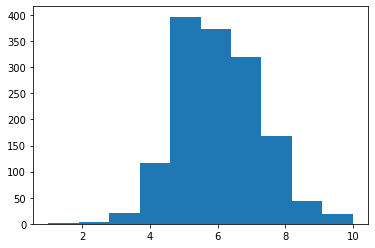

In [299]:
plt.hist(df['OverallQual'])
plt.show()

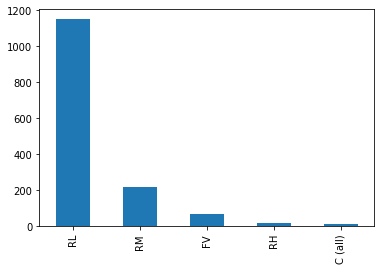

In [300]:
## visualize the distribution of a categorical column
df['MSZoning'].value_counts().plot(kind='bar')
plt.show()

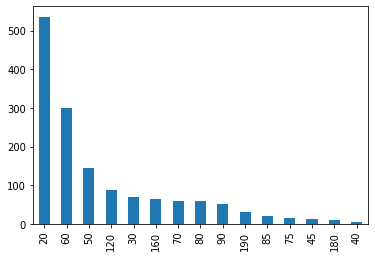

In [301]:
# other categorical columns including
df['MSSubClass'].value_counts().plot(kind='bar')

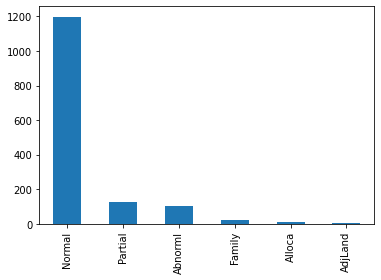

In [302]:
df['SaleCondition'].value_counts().plot(kind='bar')

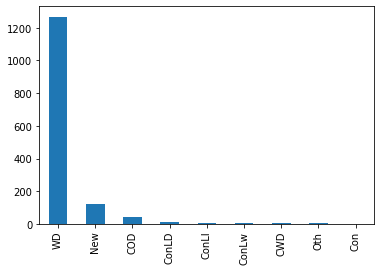

In [303]:
df['SaleType'].value_counts().plot(kind='bar')

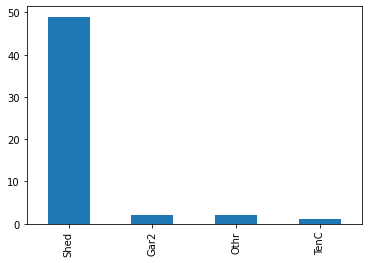

In [304]:
df['MiscFeature'].value_counts().plot(kind='bar')

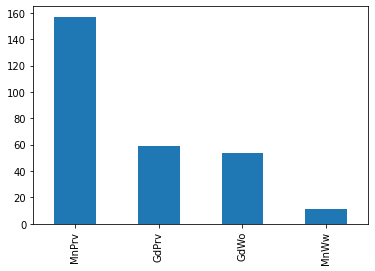

In [305]:
df['Fence'].value_counts().plot(kind='bar')

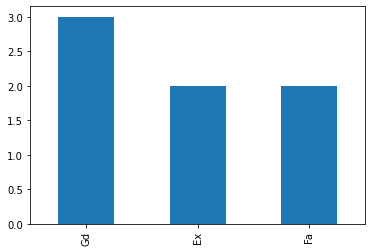

In [306]:
df['PoolQC'].value_counts().plot(kind='bar')

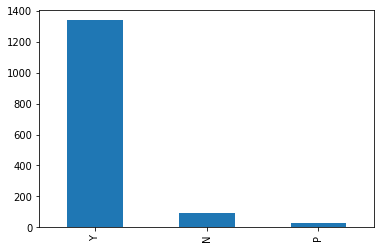

In [307]:
df['PavedDrive'].value_counts().plot(kind='bar')

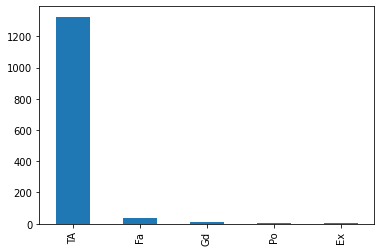

In [308]:
df['GarageCond'].value_counts().plot(kind='bar')

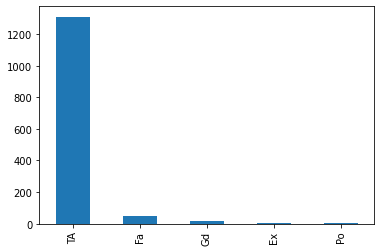

In [309]:
df['GarageQual'].value_counts().plot(kind='bar')

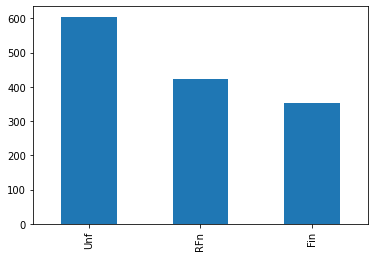

In [310]:
df['GarageFinish'].value_counts().plot(kind='bar')

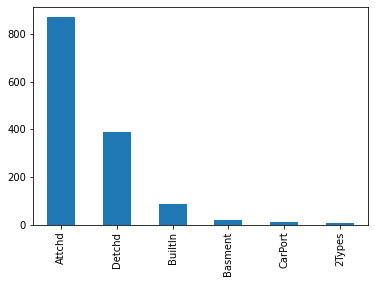

In [311]:
df['GarageType'].value_counts().plot(kind='bar')

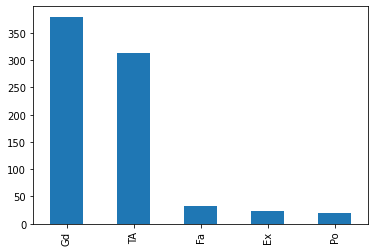

In [312]:
df['FireplaceQu'].value_counts().plot(kind='bar')

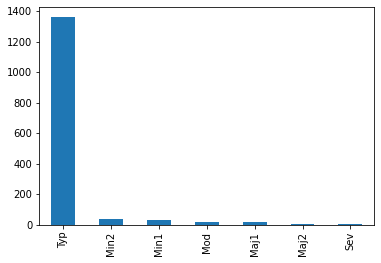

In [313]:
df['Functional'].value_counts().plot(kind='bar')

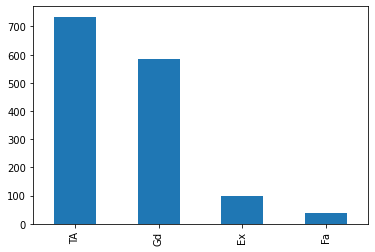

In [314]:
df['KitchenQual'].value_counts().plot(kind='bar')

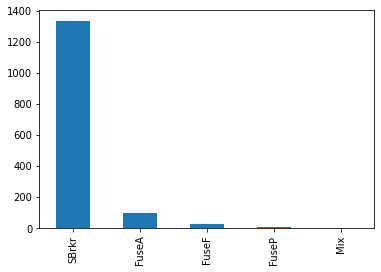

In [315]:
df['Electrical'].value_counts().plot(kind='bar')

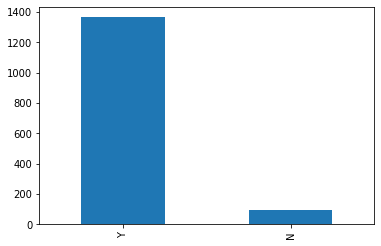

In [316]:
df['CentralAir'].value_counts().plot(kind='bar')

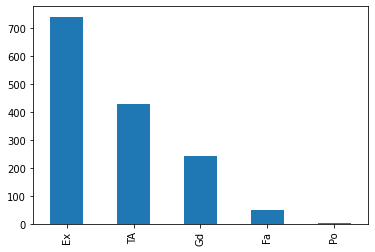

In [317]:
df['HeatingQC'].value_counts().plot(kind='bar')

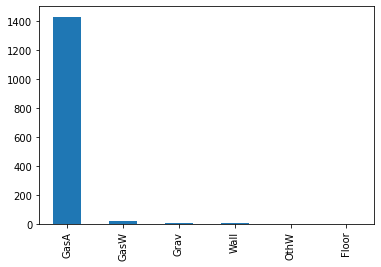

In [318]:
df['Heating'].value_counts().plot(kind='bar')

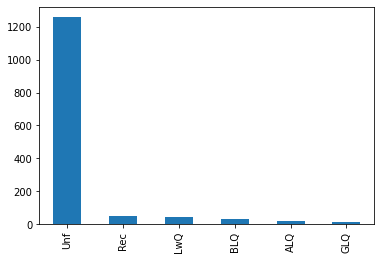

In [319]:
df['BsmtFinType2'].value_counts().plot(kind='bar')

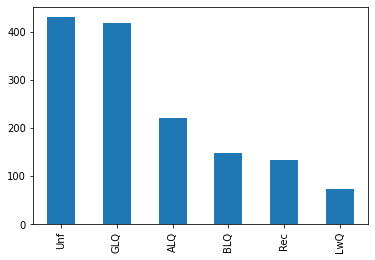

In [320]:
df['BsmtFinType1'].value_counts().plot(kind='bar')

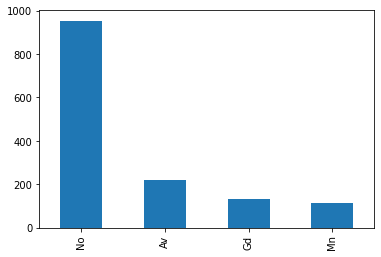

In [321]:
df['BsmtExposure'].value_counts().plot(kind='bar')

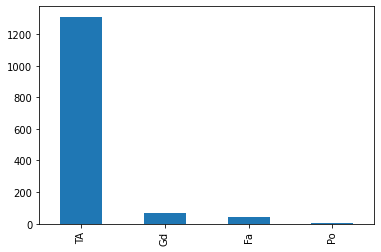

In [322]:
df['BsmtCond'].value_counts().plot(kind='bar')

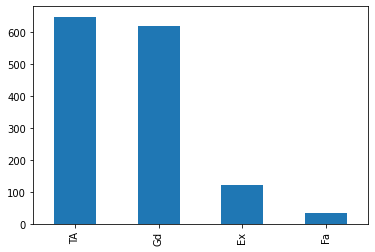

In [323]:
df['BsmtQual'].value_counts().plot(kind='bar')

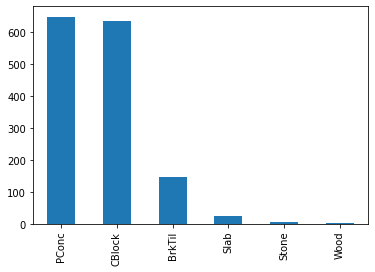

In [324]:
df['Foundation'].value_counts().plot(kind='bar')

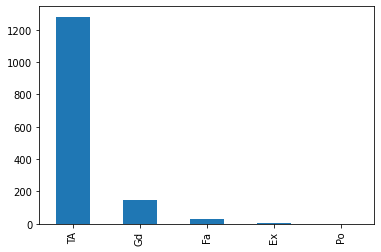

In [325]:
df['ExterCond'].value_counts().plot(kind='bar')

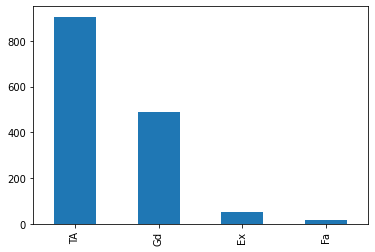

In [326]:
df['ExterQual'].value_counts().plot(kind='bar')

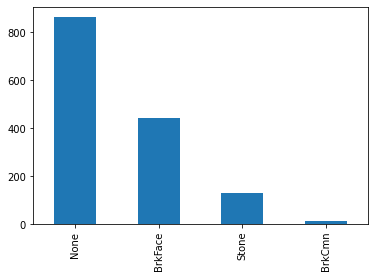

In [327]:
df['MasVnrType'].value_counts().plot(kind='bar')

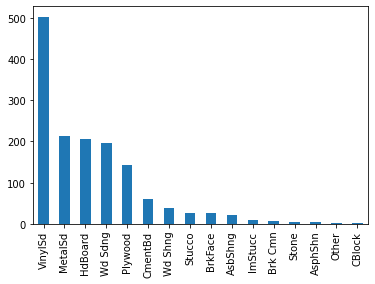

In [328]:
df['Exterior2nd'].value_counts().plot(kind='bar')

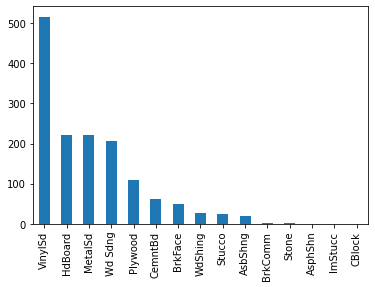

In [329]:
df['Exterior1st'].value_counts().plot(kind='bar')

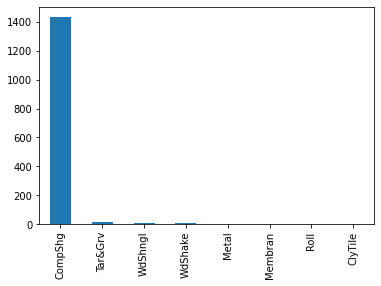

In [330]:
df['RoofMatl'].value_counts().plot(kind='bar')

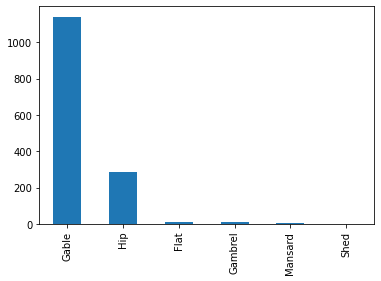

In [331]:
df['RoofStyle'].value_counts().plot(kind='bar')

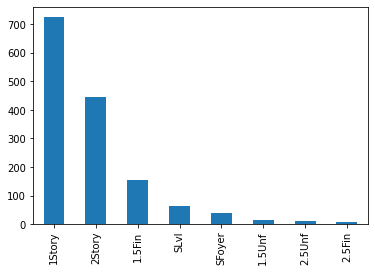

In [332]:
df['HouseStyle'].value_counts().plot(kind='bar')

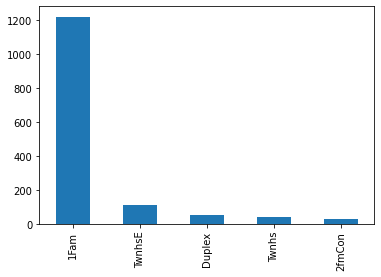

In [333]:
df['BldgType'].value_counts().plot(kind='bar')

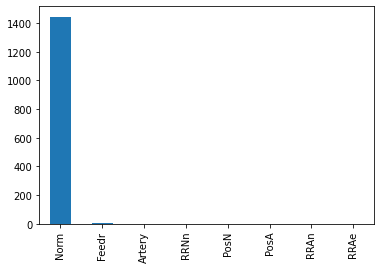

In [334]:
df['Condition2'].value_counts().plot(kind='bar')

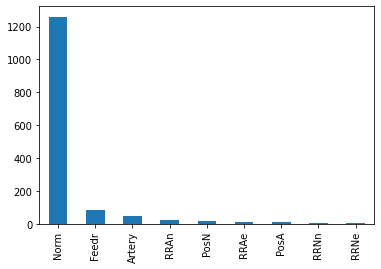

In [335]:
df['Condition1'].value_counts().plot(kind='bar')

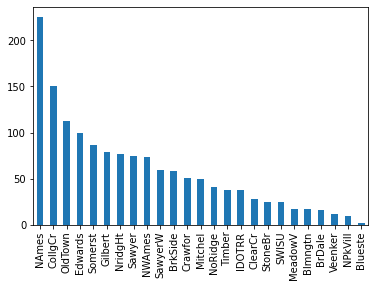

In [336]:
df['Neighborhood'].value_counts().plot(kind='bar')

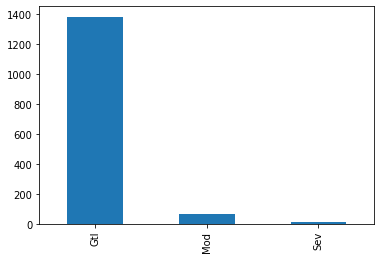

In [337]:
df['LandSlope'].value_counts().plot(kind='bar')

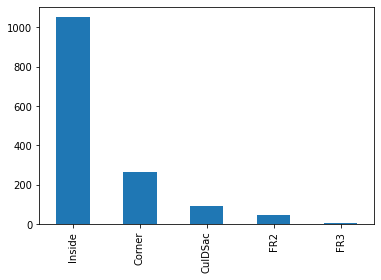

In [338]:
df['LotConfig'].value_counts().plot(kind='bar')

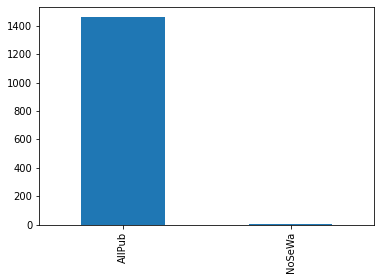

In [339]:
df['Utilities'].value_counts().plot(kind='bar')

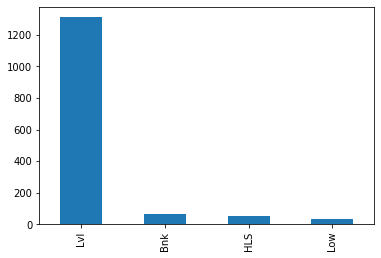

In [340]:
df['LandContour'].value_counts().plot(kind='bar')

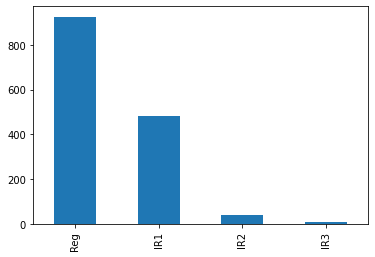

In [341]:
df['LotShape'].value_counts().plot(kind='bar')

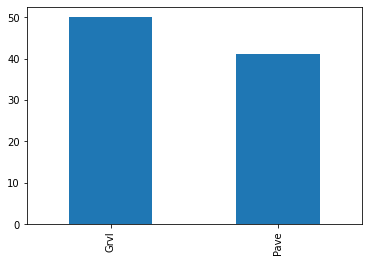

In [342]:
df['Alley'].value_counts().plot(kind='bar')

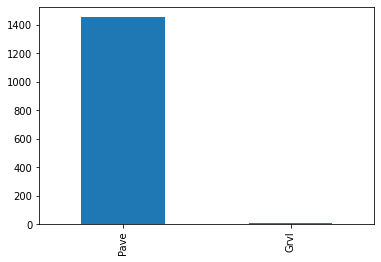

In [343]:
df['Street'].value_counts().plot(kind='bar')

# Data Qualitiy Report


In [344]:
numerical_cols = [
    "LotFrontage", "LotArea", "OverallQual", "OverallCond", "YearBuilt", 
    "YearRemodAdd", "MasVnrArea", "BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF", 
    "TotalBsmtSF", "1stFlrSF", "2ndFlrSF", "LowQualFinSF", "GrLivArea", 
    "BsmtFullBath", "BsmtHalfBath", "FullBath", "HalfBath", "BedroomAbvGr", 
    "KitchenAbvGr", "TotRmsAbvGrd", "Fireplaces", "GarageYrBlt", "GarageCars", 
    "GarageArea", "WoodDeckSF", "OpenPorchSF", "EnclosedPorch", "3SsnPorch", 
    "ScreenPorch", "PoolArea", "MiscVal", "MoSold", "YrSold", "SalePrice"
]

In [345]:
#scatterplot matrix of all numerical cols
from pandas.plotting import scatter_matrix
scatter_matrix(df[numerical_cols], alpha=0.2, figsize=(60, 60))
plt.show()

In [346]:
categorical_columns = [
     "MSZoning", "Street", "Alley",
    "LotShape", "LandContour", "Utilities", "LotConfig",
    "LandSlope", "Neighborhood", "Condition1", "Condition2", "BldgType",
    "HouseStyle", "RoofStyle", "RoofMatl", "Exterior1st", "Exterior2nd",
    "MasVnrType", "ExterQual", "ExterCond", "Foundation", "BsmtQual",
    "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "Heating",
     "HeatingQC", "CentralAir", "Electrical", "KitchenQual", "Functional",
    "FireplaceQu", "GarageType", "GarageFinish", "GarageQual", "GarageCond",
    "PavedDrive", "PoolQC", "Fence", "MiscFeature",  "SaleType","SaleCondition"
]
#"MSSubClass",

In [347]:
#sns.pairplot(df, vars=categorical_columns)
#plt.show()

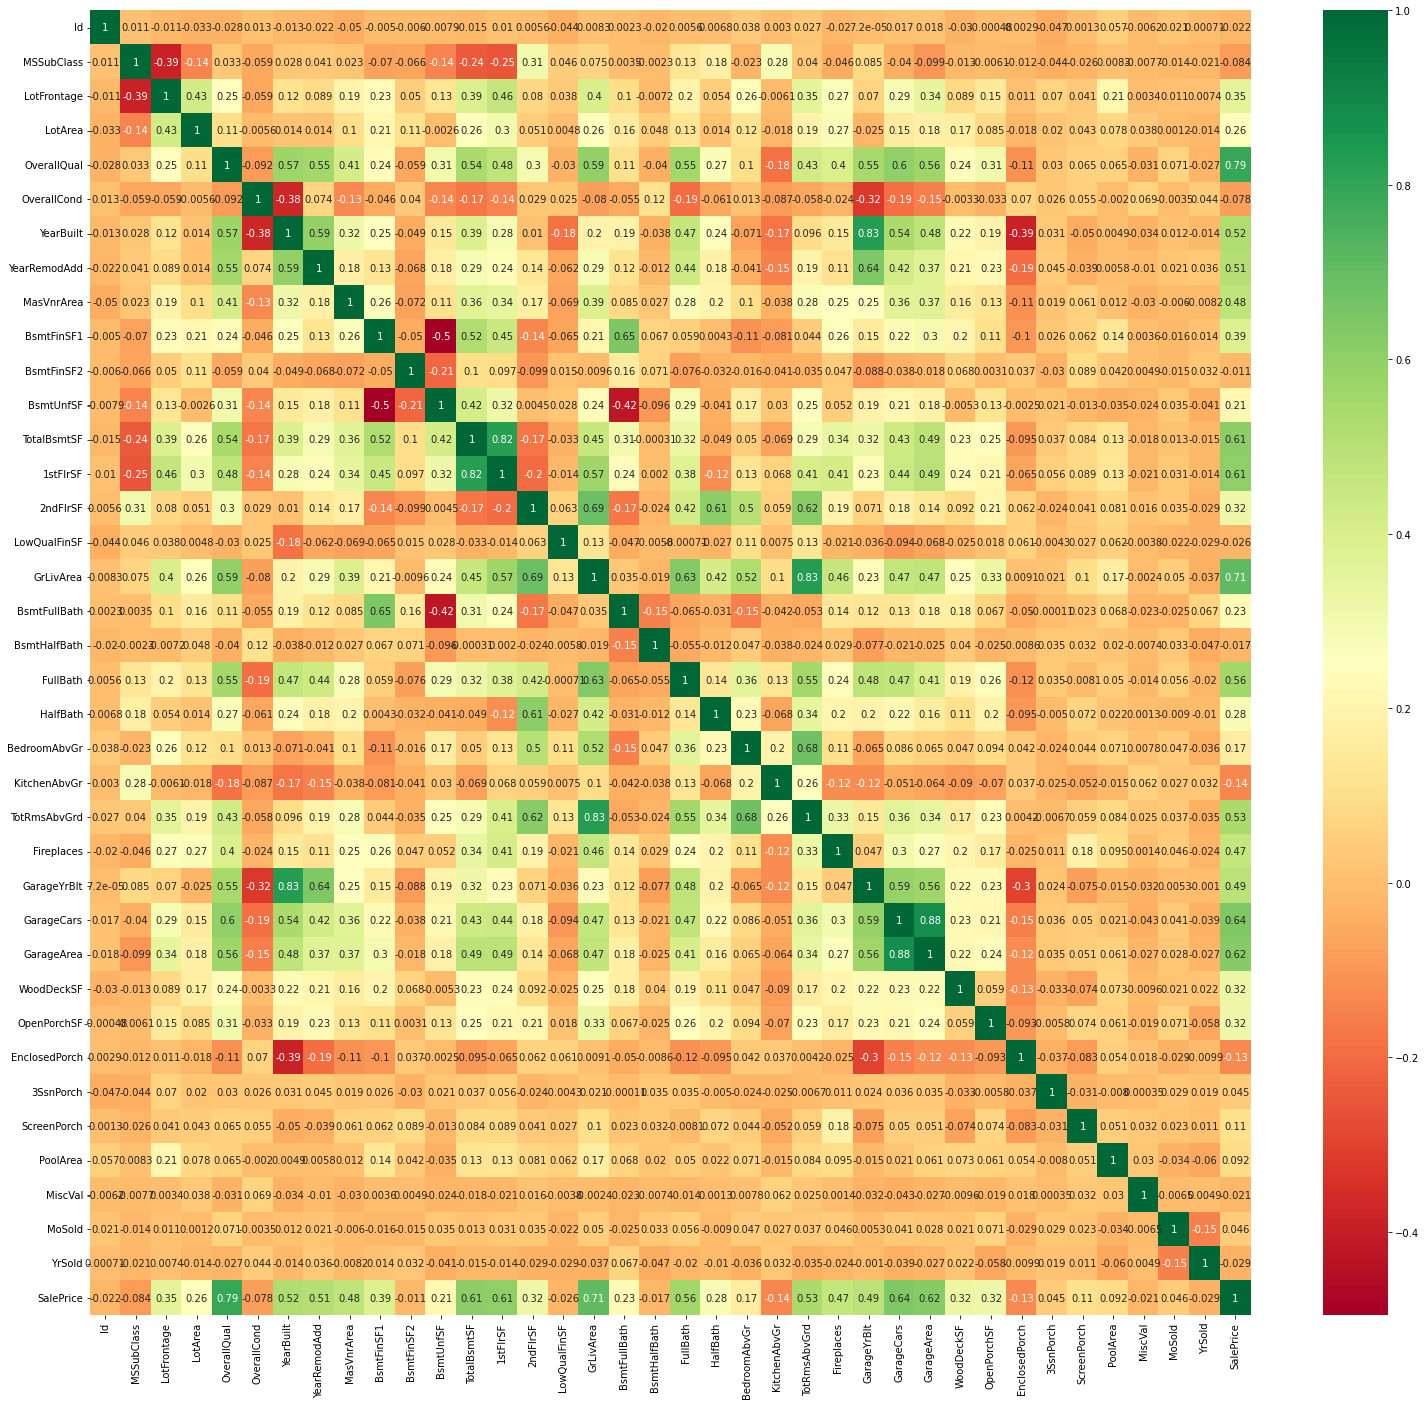

In [348]:
#heatmap for correlation between multiple columns

plt.figure(figsize=(26,24))
sns.heatmap(df.corr(), cmap='RdYlGn', annot=True)
plt.show()
###heatmap below shows correlation accrosss all columns in the DF

In [349]:
#creating a DataFrame for numerical columns data quality report
data_quality_report_1 = pd.DataFrame(df[numerical_cols].dtypes, columns=['Data Type'])
data_quality_report_1['% Missing Values'] = (df[numerical_cols].isna().sum()/len(df)*100).round(2)
data_quality_report_1['Cardinality'] = df[numerical_cols].nunique()
data_quality_report_1['Minimum'] = df[numerical_cols].min()
data_quality_report_1['Maximum'] = df[numerical_cols].max()
data_quality_report_1['Mean'] = df[numerical_cols].mean()
data_quality_report_1['Standard Deviation'] = (df[numerical_cols].std()).round(2)
data_quality_report_1['1st Quartile'] = df[numerical_cols].quantile(.25)
data_quality_report_1['3rd Quartile'] = df[numerical_cols].quantile(.75)

In [350]:
data_quality_report_1
#gives us a general idea of important stats within the data set
###main issues can be seen through missing values which will be approached later on

,Data Type,% Missing Values,Cardinality,Minimum,Maximum,Mean,Standard Deviation,1st Quartile,3rd Quartile
LotFrontage,float64,17.74,110,21.0,313.0,70.049958,24.28,59.00,80.00
LotArea,int64,0.00,1073,1300.0,215245.0,10516.828082,9981.26,7553.50,11601.50
OverallQual,int64,0.00,10,1.0,10.0,6.099315,1.38,5.00,7.00
OverallCond,int64,0.00,9,1.0,9.0,5.575342,1.11,5.00,6.00
YearBuilt,int64,0.00,112,1872.0,2010.0,1971.267808,30.20,1954.00,2000.00
YearRemodAdd,int64,0.00,61,1950.0,2010.0,1984.865753,20.65,1967.00,2004.00
MasVnrArea,float64,0.55,327,0.0,1600.0,103.685262,181.07,0.00,166.00
BsmtFinSF1,int64,0.00,637,0.0,5644.0,443.639726,456.10,0.00,712.25
BsmtFinSF2,int64,0.00,144,0.0,1474.0,46.549315,161.32,0.00,0.00
BsmtUnfSF,int64,0.00,780,0.0,2336.0,567.240411,441.87,223.00,808.00


In [351]:
#creating a DataFrame for categorical columns data quality report
data_quality_report_2 = pd.DataFrame(df[categorical_columns].dtypes, columns=['Data Type'])
data_quality_report_2['% Missing Values'] = (df[categorical_columns].isna().sum()/len(df)*100).round(00)
data_quality_report_2['Cardinality'] = df[categorical_columns].nunique()
#for column in categorical_columns:
  #mode = df[column].mode()
  #data_quality_report_2.at[column, 'Mode'] = mode[0]
for column in categorical_columns:
  mode = df[column].mode()
  mode_frequency = df[column].value_counts().loc[mode[0]]
  mode_percentage = (mode_frequency / len(df) * 100).round(2)
  data_quality_report_2.at[column, 'Mode'] = mode[0]
  data_quality_report_2.at[column, 'Mode Freq.'] = mode_frequency
  data_quality_report_2.at[column, 'Mode %'] = mode_percentage

  #if df[column].nunique() > 1:
    #mode_2 = df[column].mode()
    #data_quality_report_2.at[column, '2nd Mode'] = mode_2[1]
    #data_quality_report_2.at[column, '2nd Mode Freq'] = df[column].value_counts().loc[mode_2[1]]
    #data_quality_report_2.at[column, '2nd Mode %'] = df[column].value_counts().loc[mode_2[1]] / len(df) * 100
  #else:
    #data_quality_report_2.at[column, '2nd Mode'] = "N/A"
    #data_quality_report_2.at[column, '2nd Mode Freq.'] = "N/A"
    #data_quality_report_2.at[column, '2nd Mode %'] = "N/A"

###issue with getting second mode, some cols dont have one

In [352]:
data_quality_report_2
#since these are the categorical columns here the mode is important to look at a long with missing values which will also be approached in the Data Quality Issues Report

,Data Type,% Missing Values,Cardinality,Mode,Mode Freq.,Mode %
MSZoning,object,0.0,5,RL,1151.0,78.84
Street,object,0.0,2,Pave,1454.0,99.59
Alley,object,94.0,2,Grvl,50.0,3.42
LotShape,object,0.0,4,Reg,925.0,63.36
LandContour,object,0.0,4,Lvl,1311.0,89.79
Utilities,object,0.0,2,AllPub,1459.0,99.93
LotConfig,object,0.0,5,Inside,1052.0,72.05
LandSlope,object,0.0,3,Gtl,1382.0,94.66
Neighborhood,object,0.0,25,NAmes,225.0,15.41
Condition1,object,0.0,9,Norm,1260.0,86.30


# PART 2 Data Cleaning

In [353]:
#DATA QUALITY ISSUES

## Feature        |        Data Quality Issue        |    Potential Handeling Strategies
#---------------------------------------------------------------------------------------------
# 1.LotFrontage   | 17.7% missing values             |      Fill in with mean
# 2.GarageYrBlt   | 5.55% missing values             |      drop missing rows
# 3.Alley         | over 90% missing values          |      Drop records too many missing values
# 4.BsmtExposure	|	
# BsmtFinType1	  |
# BsmtFinType2    |
# BsmtQual	      
# BsmtCond
# BsmtExposure	

# GarageType	
# GarageFinish	
# MasVnrType      | all above from no. 4 around 3%   |     drop the rows with 
#                     missing values                 |     these missing values
# FireplaceQu	    |   47% missing values             |     drop
# 5. Alley
# 6. PoolQC
# 7. Fence	      |
# 8. MiscFeature  |   5,6,7,8 over 60% missing val   |    Drop entire cols

###Approching Missing Values


In [354]:
#create a new copy of df
df2 = df.copy()

In [355]:
#drop any col with over 60% missing values
df2.dropna(axis=1,thresh=len(df2)*0.6,inplace=True)

In [356]:
#fill in numerical cols with mean
df2['LotFrontage'] = df2['LotFrontage'].fillna(df2['LotFrontage'].mean())
#df2[['LotFrontage']].isnull().sum()

In [357]:
#pd.set_option('display.max_columns', None)
#pd.reset_option('max_columns')
df2['LotFrontage'].isnull().sum()
#checking to see if there are still missing values

0

In [358]:
#drop remaining rows with missing values
df2.dropna(inplace=True)

###Outliers

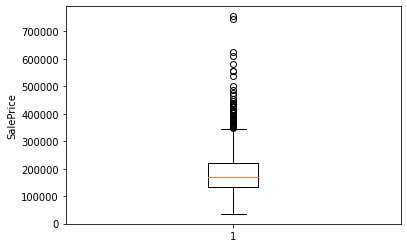

In [361]:
## create a box plot to visualize the distribution of a numeric column
##Visualize distribution before dropping outliers
plt.boxplot(df2['SalePrice'])
plt.ylabel('SalePrice')
plt.show()

In [362]:
Q1 = df2['SalePrice'].quantile(.25)
Q3 = df2['SalePrice'].quantile(.75)
IQR = Q3 - Q1

In [363]:
#Based on the the previous code, created an upper and lower limit in which the outliers will be taken out
low_lim = Q1 - 1.5*(IQR)
up_lim = Q3 + 1.5*(IQR)

In [364]:
#resaved the DF and removed the outliers within the sale price
#df2 = df2[df2['SalePrice'].between(low_lim, up_lim)]
df2['SalePrice']= df2['SalePrice'].clip(lower=7500.0, upper=347500.0)

In [375]:
#checking previous code and outliers in the sales columns are removes
plt.boxplot(df2['SalePrice'])
plt.ylabel('SalePrice')
plt.show()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2007,WD,Normal,175000.0
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2010,WD,Normal,210000.0
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2500,5,2010,WD,Normal,266500.0
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,112,0,0,0,0,4,2010,WD,Normal,142125.0


# PART 3 - Collinearity


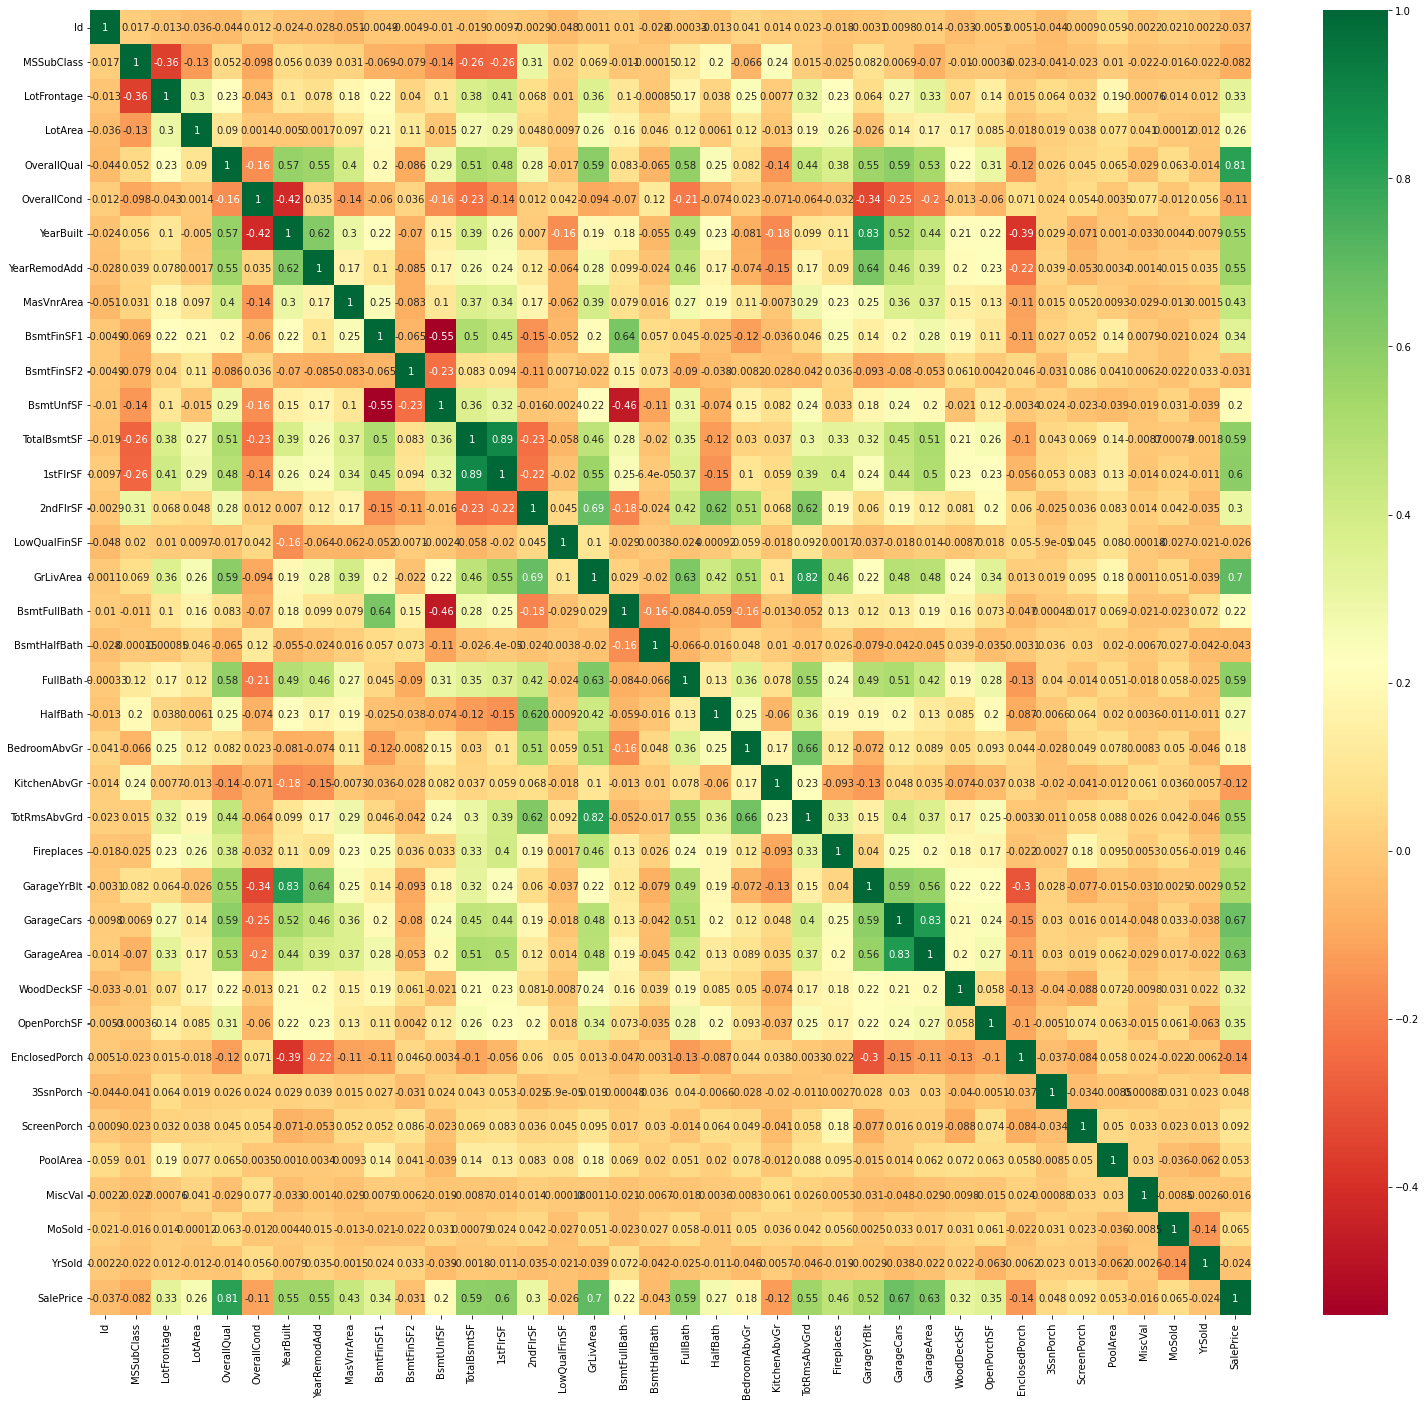

In [377]:
# create a heatmap to visualize the correlation between multiple columns
plt.figure(figsize=(26, 24))
sns.heatmap(df2.corr(), cmap='RdYlGn', annot=True)
plt.show()

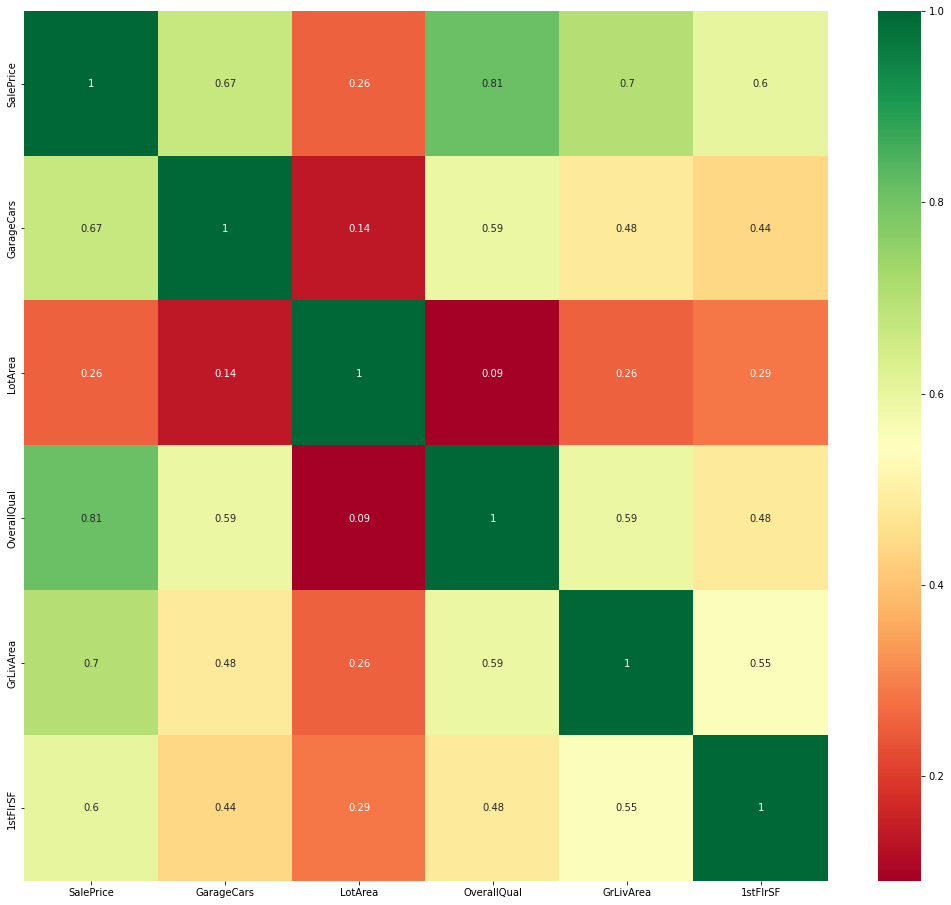

In [389]:
pred = df2[['SalePrice','GarageCars','LotArea','OverallQual','GrLivArea','1stFlrSF']]
plt.figure(figsize=(18, 16))
sns.heatmap(pred.corr(), cmap='RdYlGn', annot=True)
plt.show()
#based on previous heatmap chose variables that had a correlation coefficient of  + or - 6 towards the sale price.
#this is just a general idea variables that can be used to predict Sale Price however further analysis should be conducted to determine the accuracy.
##it is important to note that multicollinearity should be invested in the previous heatmap, specifically take out more independent variables that are highly correlated with one another